This code aims to use Principal Component Analysis to reduce the number of variables needed to represent a farm.

Following on from this we can run clustering or predictive modelling.

    Clustering - grouping farms together based on the 'principal components' generated in this analysis.

    Predictive modelling - Creating a model that estimates CSI score so that we can determine what variables are the most important predictors of CSI.

In [1]:
import pandas as pd
from pre_process import pre_process
from run_pca import run_pca, display_pca
import pandas_profiling

# Import Data

In [2]:
path = 'C:/Users/Christopher/Desktop/datadive2019_solidaridad/INDIA_COTTON/'
IN_cotton_survey = pd.read_csv(path+'IN_cotton_survey.csv')
column_types = pd.read_csv(path+'column_types.csv')

In [3]:
# Create column lists
columns_ordinal = set(column_types.loc[column_types.cat_ord=='ORDINAL', 'column'])
columns_categorical = set(column_types.loc[column_types.cat_ord=='CATEGORICAL', 'column'])

columns_farming_finance = set(column_types.loc[column_types.group=='farming_finance', 'column'])
columns_socio_economic = set(column_types.loc[column_types.group=='socio-economic', 'column'])
columns_household = set(column_types.loc[column_types.group=='household', 'column'])
columns_farming_production_sys = set(column_types.loc[column_types.group=='farming_production_sys', 'column'])

In [4]:
# Based on Pandas profiling file, these variables can be dropped due to high correlations or constant value
VARS_TO_DROP = ['adaptation_score_normal','cotton_sold','intercrop_harvest','intercrop_income',
                'leased_land','mitigation_score_normal','own_land','oxes','preharvest_acre',
               'presow_acre','productivity_actual','productivity_estimated','seed_actual','seed_cost',
               'seed_estimated','total_income', 'intercrop_acre','seed_source', 'irrigated_land', 'intercrop_name']

# These are the top 10 most predictive variables from a RandomForestRegressor
VARS_TO_KEEP = ['irrigation_source', 'irrigation_cost', 'irrigation_status',
                'total_cost', 'labour_cost', 'life_insurance',
                'intercrop_name', 'seed_type', 'machinery_cost', 'weeder']

In [5]:
# Format the input data
X_train = pre_process(data=IN_cotton_survey,
                      id_column='farmer_id',
                      columns_ordinal=columns_ordinal,
                      columns_categorical=columns_categorical,
                      keep_variables=VARS_TO_KEEP)
#                       drop_variables=VARS_TO_DROP)

Number of variables used: 10
Ordinal columns: {'irrigation_cost', 'machinery_cost', 'total_cost', 'labour_cost'}
Categorical columns: {'weeder', 'irrigation_source', 'life_insurance', 'intercrop_name', 'irrigation_status', 'seed_type'}


C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
profile = IN_cotton_survey.profile_report(title='Pandas Profiling Report - India Cotton')
profile.to_file(output_file="India-Cotton-Profile.html")

In [8]:
profile = X_train.profile_report(title='Pandas Profiling Report - India Cotton (Cleaned Data)')
profile.to_file(output_file="India-Cotton-Profile(Cleaned Data).html")

# PCA

#### Running PCA on all variables
Approx 90% of the information in this dataset can be represented with 25 variables.

PCA excecuted with 16 principal components.


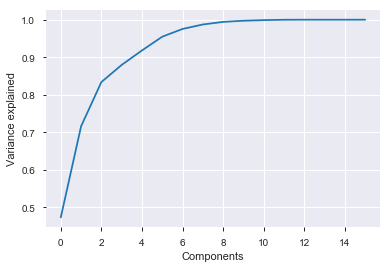

In [6]:
pca_all, pcacols_all = run_pca(data=X_train,
                               column_set=set(X_train.columns),
#                                n_pca=10)
                               n_pca=None)

Most important variables that describe the first principal component.

Could be interpreted as '...'.

In [9]:
display_pca(pca_all, pcacols_all, 0)

,0,1,2,3,4,5
labour_cost,0.575919,-0.0142039,0.063012,0.307963,-0.258743,-0.0326004
total_cost,0.454614,-0.101605,0.735224,-0.0664342,0.100021,0.136765
intercrop_name_Tur,0.260277,0.0937551,-0.130243,0.0798055,-0.039188,0.000546915
seed_type,0.260277,0.0937551,-0.130243,0.0798055,-0.039188,0.000546915
irrigation_cost,0.129699,-0.792103,-0.186104,-0.0864718,0.204614,0.00874285
irrigation_source_1,0.0583474,-0.0243281,0.145632,-0.219733,0.236802,0.0997118
weeder,0.0388377,-0.0136432,0.1671,-0.537845,-0.308634,-0.750468
irrigation_source_2,0.0188432,-0.263851,-0.18268,0.365861,-0.447101,-0.210492
irrigation_source_6,0.000857161,0.000579087,-0.000302053,-0.00102204,0.0020115,0.00713346
irrigation_source_3,0.000236321,-0.00786484,-0.00793137,-0.011623,0.0362767,0.0294886


Most important variables that describe the second principal component.

Could be interpreted as '..'.

In [10]:
display_pca(pca_all, pcacols_all, 1)

,0,1,2,3,4,5
irrigation_source_0,-0.0711313,0.301579,0.100122,0.0785826,-0.0770669,0.0179024
irrigation_status,-0.0698635,0.29977,0.0980362,0.0785625,-0.076034,0.0227644
intercrop_name_Tur,0.260277,0.0937551,-0.130243,0.0798055,-0.039188,0.000546915
seed_type,0.260277,0.0937551,-0.130243,0.0798055,-0.039188,0.000546915
life_insurance,-0.0399459,0.0537566,0.110192,0.505952,0.612751,-0.592726
irrigation_source_6,0.000857161,0.000579087,-0.000302053,-0.00102204,0.0020115,0.00713346
irrigation_source_4,-0.00715268,-0.00611491,-0.0548412,-0.212066,0.249077,0.0562555
irrigation_source_3,0.000236321,-0.00786484,-0.00793137,-0.011623,0.0362767,0.0294886
weeder,0.0388377,-0.0136432,0.1671,-0.537845,-0.308634,-0.750468
labour_cost,0.575919,-0.0142039,0.063012,0.307963,-0.258743,-0.0326004


Most important variables that describe the third principal component.

Could be interpreted as '...'.

In [11]:
display_pca(pca_all, pcacols_all, 2)

,0,1,2,3,4,5
total_cost,0.454614,-0.101605,0.735224,-0.0664342,0.100021,0.136765
machinery_cost,-0.474061,-0.285449,0.502593,0.298839,-0.273497,0.0803484
weeder,0.0388377,-0.0136432,0.1671,-0.537845,-0.308634,-0.750468
irrigation_source_1,0.0583474,-0.0243281,0.145632,-0.219733,0.236802,0.0997118
intercrop_name_NA,-0.260277,-0.0937551,0.130243,-0.0798055,0.039188,-0.000546915
life_insurance,-0.0399459,0.0537566,0.110192,0.505952,0.612751,-0.592726
irrigation_source_0,-0.0711313,0.301579,0.100122,0.0785826,-0.0770669,0.0179024
irrigation_status,-0.0698635,0.29977,0.0980362,0.0785625,-0.076034,0.0227644
labour_cost,0.575919,-0.0142039,0.063012,0.307963,-0.258743,-0.0326004
irrigation_source_6,0.000857161,0.000579087,-0.000302053,-0.00102204,0.0020115,0.00713346


Most important variables that describe the fourth principal component.

Could be interpreted as '...'.

In [12]:
display_pca(pca_all, pcacols_all, 3)

,0,1,2,3,4,5
life_insurance,-0.0399459,0.0537566,0.110192,0.505952,0.612751,-0.592726
irrigation_source_2,0.0188432,-0.263851,-0.18268,0.365861,-0.447101,-0.210492
labour_cost,0.575919,-0.0142039,0.063012,0.307963,-0.258743,-0.0326004
machinery_cost,-0.474061,-0.285449,0.502593,0.298839,-0.273497,0.0803484
intercrop_name_Tur,0.260277,0.0937551,-0.130243,0.0798055,-0.039188,0.000546915
seed_type,0.260277,0.0937551,-0.130243,0.0798055,-0.039188,0.000546915
irrigation_source_0,-0.0711313,0.301579,0.100122,0.0785826,-0.0770669,0.0179024
irrigation_status,-0.0698635,0.29977,0.0980362,0.0785625,-0.076034,0.0227644
irrigation_source_6,0.000857161,0.000579087,-0.000302053,-0.00102204,0.0020115,0.00713346
irrigation_source_3,0.000236321,-0.00786484,-0.00793137,-0.011623,0.0362767,0.0294886


Using the original data we have 73 columns, which makes clustering or prediction a complicated task.

In [11]:
# Cleaned data
X_train.head()

,total_income,preharvest_acre,biopesticide,income_organic,intercrop_income,loan,poultry,presow_acre,total_cost,oxes,...,irrigation_source_1,irrigation_source_2,irrigation_source_3,irrigation_source_4,irrigation_source_6,seed_source_-99.0,seed_source_3.0,housing_1,housing_2,housing_3
farmer_id,,,,,,,,,,,,,,,,,,,,,
c1,-0.022581,-0.403723,4.427003,2.588199,0.907707,0.060523,0.313363,-0.337374,2.979339,-0.506834,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
c10,-0.254185,-0.403723,2.474018,1.155528,-0.395204,0.060523,0.313363,-0.337374,2.678549,1.973032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
c11,0.084216,-0.403723,4.427003,2.461526,3.364773,0.060523,0.313363,-0.337374,2.979339,-0.506834,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
c12,0.273954,-0.403723,4.427003,1.915820,2.358736,0.060523,0.313363,-0.337374,3.395004,1.973032,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
c13,-0.182138,-0.403723,2.083421,1.454583,0.875648,0.060523,0.313363,-0.337374,2.842548,1.973032,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


We now only need the first few columns of this data set to tell us most of what we need to know about each farm.

In [14]:
# Data transformed using PCA
X_pca = pd.DataFrame(pca_all.transform(X_train),
                     index=X_train.index)
X_pca.to_csv(path+'IN_cotton_survey_PCA.csv')
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
farmer_id,,,,,,,,,,,,,,,,,,,,,
c1,0.635537,2.298342,-0.558270,1.386602,0.557713,2.904967,-0.301753,-0.792376,0.571210,-1.887153,...,1.557076,0.626302,1.222423,0.411884,-1.021971,-0.532201,-2.393530,-1.950337,1.449010,-1.492067
c10,0.802384,1.203057,-0.125392,0.146752,-0.130751,1.799833,-1.376923,-0.865775,-0.499089,0.216061,...,0.448537,1.921070,0.734969,0.206954,0.245286,1.164070,-1.807666,-0.916048,2.891042,-1.893743
c11,1.957903,2.128715,-0.336797,1.192415,0.490926,1.946975,-0.857031,-0.599910,-0.214378,-1.934075,...,1.250071,0.463023,1.324383,0.103647,1.586572,-0.870585,-3.802779,-1.751634,1.085843,-1.380107
c12,1.908248,1.887544,-0.216119,0.153665,1.383332,2.624312,-1.450368,-0.678225,-1.509314,-1.537663,...,-1.197970,0.227386,0.080764,-1.291397,0.998063,-0.761152,-2.978978,-2.204083,1.429652,-1.798962
c13,1.284557,0.921901,-0.109627,-0.187409,-0.642403,1.538449,-1.697867,-0.626960,-0.491922,-0.651485,...,0.259229,0.435039,1.009270,-0.405371,0.756136,0.976665,-2.754110,-1.507524,2.128661,-2.316132


## Running PCA on smaller sections of data

We can manually separate columns that are about a similar topic. This could give us more control over the interpretability of principal components.

#### Farming Production

In [ ]:
pca_farming_production_sys, pcacols_farming_production_sys = run_pca(data=X_train,
                                                     column_set=columns_farming_production_sys)
print(columns_farming_production_sys)

#### Socio-economic

In [ ]:
pca_socio_economic, pcacols_socio_economic = run_pca(data=X_train,
                                                     column_set=columns_socio_economic)
print(columns_socio_economic)

#### Household

In [ ]:
pca_household, pcacols_household = run_pca(data=X_train,
                                           column_set=columns_household)
print(columns_household)

#### Farming Finance

In [ ]:
pca_farming_finance, pcacols_farming_finance = run_pca(data=X_train,
                                                     column_set=columns_farming_finance)
print(columns_farming_finance)